참고 출처 : https://github.com/corazzon/finance-data-analysis

In [1]:
%pwd

'C:\\Users\\user7\\Desktop\\김별희\\증권데이터수집분석'

In [2]:
import pandas as pd
import seaborn as sns

# FinanceDataReader 설치

In [3]:
pip install -U finance-datareader

Requirement already up-to-date: finance-datareader in e:\anaconda\lib\site-packages (0.9.31)Note: you may need to restart the kernel to use updated packages.



In [4]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.31'

# 한국거래소 상장종목 전체 가져오기

In [5]:
fdr.StockListing("KRX")

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"이현우, 박대현",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7201,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7202,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7203,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7204,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [6]:
df_krx = fdr.StockListing("KRX")

In [7]:
# csv 형태로 저장
df_krx.to_csv("krx.csv",index=False)

In [8]:
df = pd.read_csv("krx.csv",dtype={"Symbol":object})  # Symbol 항목을 object type으로 불러옴

# 데이터 요약

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 0 to 7205
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          7206 non-null   object
 1   Market          7206 non-null   object
 2   Name            7206 non-null   object
 3   Sector          2438 non-null   object
 4   Industry        2419 non-null   object
 5   ListingDate     2438 non-null   object
 6   SettleMonth     2438 non-null   object
 7   Representative  2438 non-null   object
 8   HomePage        2258 non-null   object
 9   Region          2438 non-null   object
dtypes: object(10)
memory usage: 563.1+ KB


In [10]:
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,7206,7206,7206,2438,2419,2438,2438,2438,2258,2438
unique,7206,3,7206,158,2264,1799,9,2319,2237,22
top,020000,KOSPI,한국G342KOSPI200풋,특수 목적용 기계 제조업,기업인수합병,1996-07-03,12월,-,http://www.ubiquoss.com,서울특별시
freq,1,5550,1,144,37,8,2378,5,2,987


In [11]:
# 중복 제거
df.nunique()

Symbol            7206
Market               3
Name              7206
Sector             158
Industry          2264
ListingDate       1799
SettleMonth          9
Representative    2319
HomePage          2237
Region              22
dtype: int64

In [12]:
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

## "ListingData" 데이터 타입 변경

In [36]:
# csv파일로 저장한 후 불러온 상태라 object 형태
df["ListingDate"]

0       2002-04-23
1       2015-08-21
2       1999-08-11
3       2001-12-04
4       2017-04-07
           ...    
7201           NaN
7202           NaN
7203    1976-06-29
7204    2000-02-03
7205    2017-07-20
Name: ListingDate, Length: 7206, dtype: object

In [40]:
df["ListingDate"] = pd.to_datetime(df["ListingDate"])
df["ListingDate"].head(1)

0   2002-04-23
Name: ListingDate, dtype: datetime64[ns]

## ListingYear 파생변수 생성

In [45]:
df["ListingYear"] = df["ListingDate"].dt.year
df["ListingYear"].dtypes

dtype('float64')

In [44]:
df.head(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"이현우, 박대현",http://www.ajnet.co.kr,서울특별시,2015.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0


# 시각화
https://seaborn.pydata.org/index.html

## 한글 폰트 설정

In [48]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [56]:
import matplotlib.pyplot as plt

font_family = get_font_family()

# 폰트 설정
plt.rc("font", family= font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일
plt.style.use("ggplot")
# retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

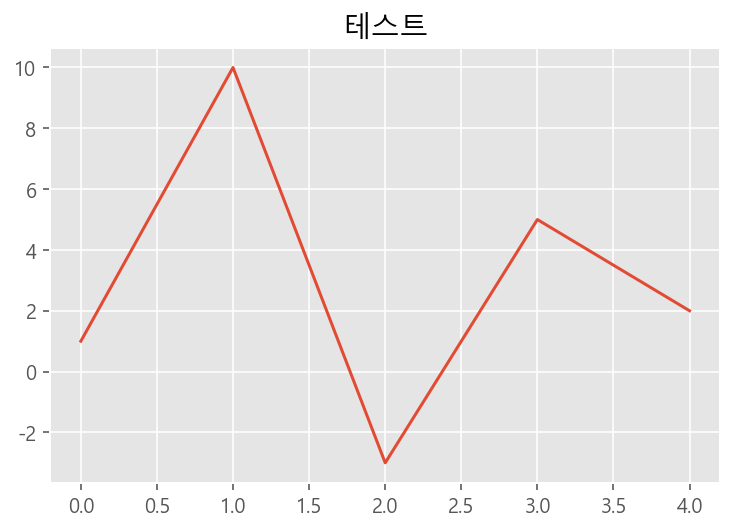

In [57]:
# 설정 확인
pd.Series([1,10,-3,5,2]).plot(title="테스트")

##  빈도수 시각화

### 변수 Market

In [58]:
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [59]:
df["Market"].value_counts()

KOSPI     5550
KOSDAQ    1518
KONEX      138
Name: Market, dtype: int64

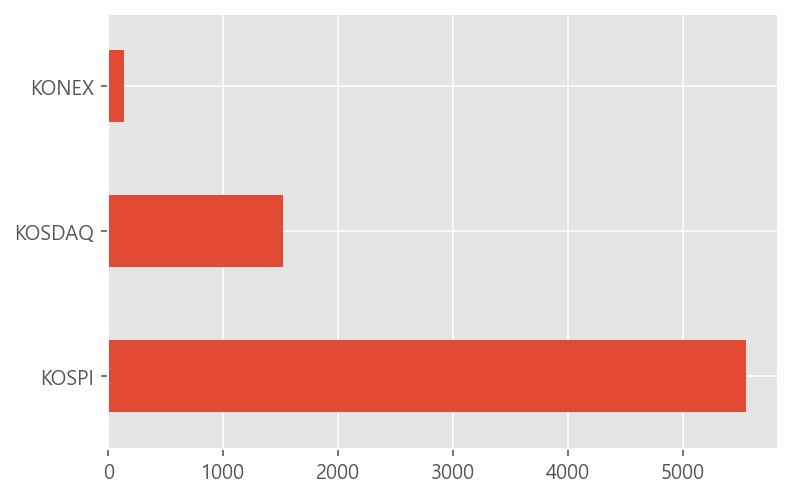

In [128]:
# pandas 

df["Market"].value_counts().plot.barh()

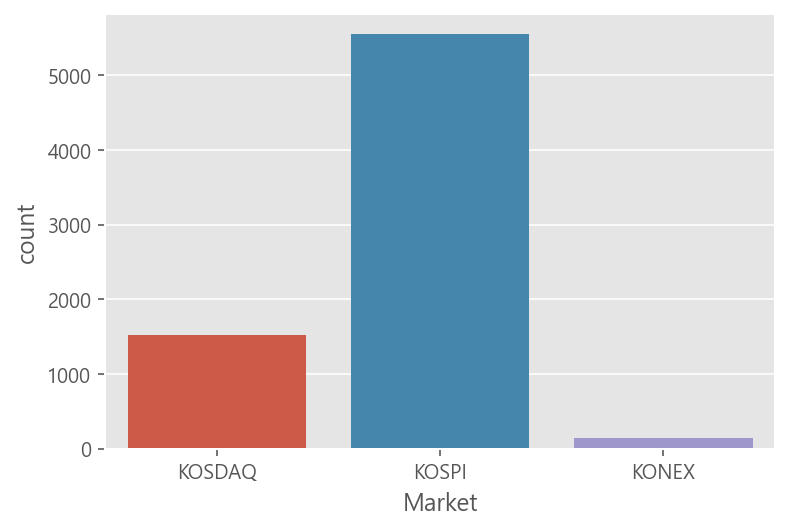

In [129]:
# seaborn

sns.countplot(data=df, x="Market")

### 변수 Sector

In [66]:
df["Sector"].value_counts()

특수 목적용 기계 제조업            144
소프트웨어 개발 및 공급업           141
전자부품 제조업                 123
자동차 신품 부품 제조업             98
의약품 제조업                   94
                        ... 
자동차 재제조 부품 제조업             1
섬유제품 염색, 정리 및 마무리 가공업      1
악기 제조업                     1
기타 교육기관                    1
시장조사 및 여론조사업               1
Name: Sector, Length: 158, dtype: int64

#### 빈도수 상위 15개 Sector만 추출

In [69]:
sector_count_top = df["Sector"].value_counts().head(15)
sector_count_top

특수 목적용 기계 제조업      144
소프트웨어 개발 및 공급업     141
전자부품 제조업           123
자동차 신품 부품 제조업       98
의약품 제조업             94
기타 금융업              93
기타 화학제품 제조업         91
금융 지원 서비스업          75
통신 및 방송 장비 제조업      73
반도체 제조업             57
1차 철강 제조업           57
자연과학 및 공학 연구개발업     55
의료용 기기 제조업          52
일반 목적용 기계 제조업       44
플라스틱제품 제조업          43
Name: Sector, dtype: int64

#### 시각화

In [74]:
df_sector_15 = df[df["Sector"].isin(sector_count_top.index)] # 빈도수 상위 15개인 행들만을 추출하여 저장
df_sector_15.head(3) 

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0


Text(0.5, 1.0, '섹터 별 빈도수')

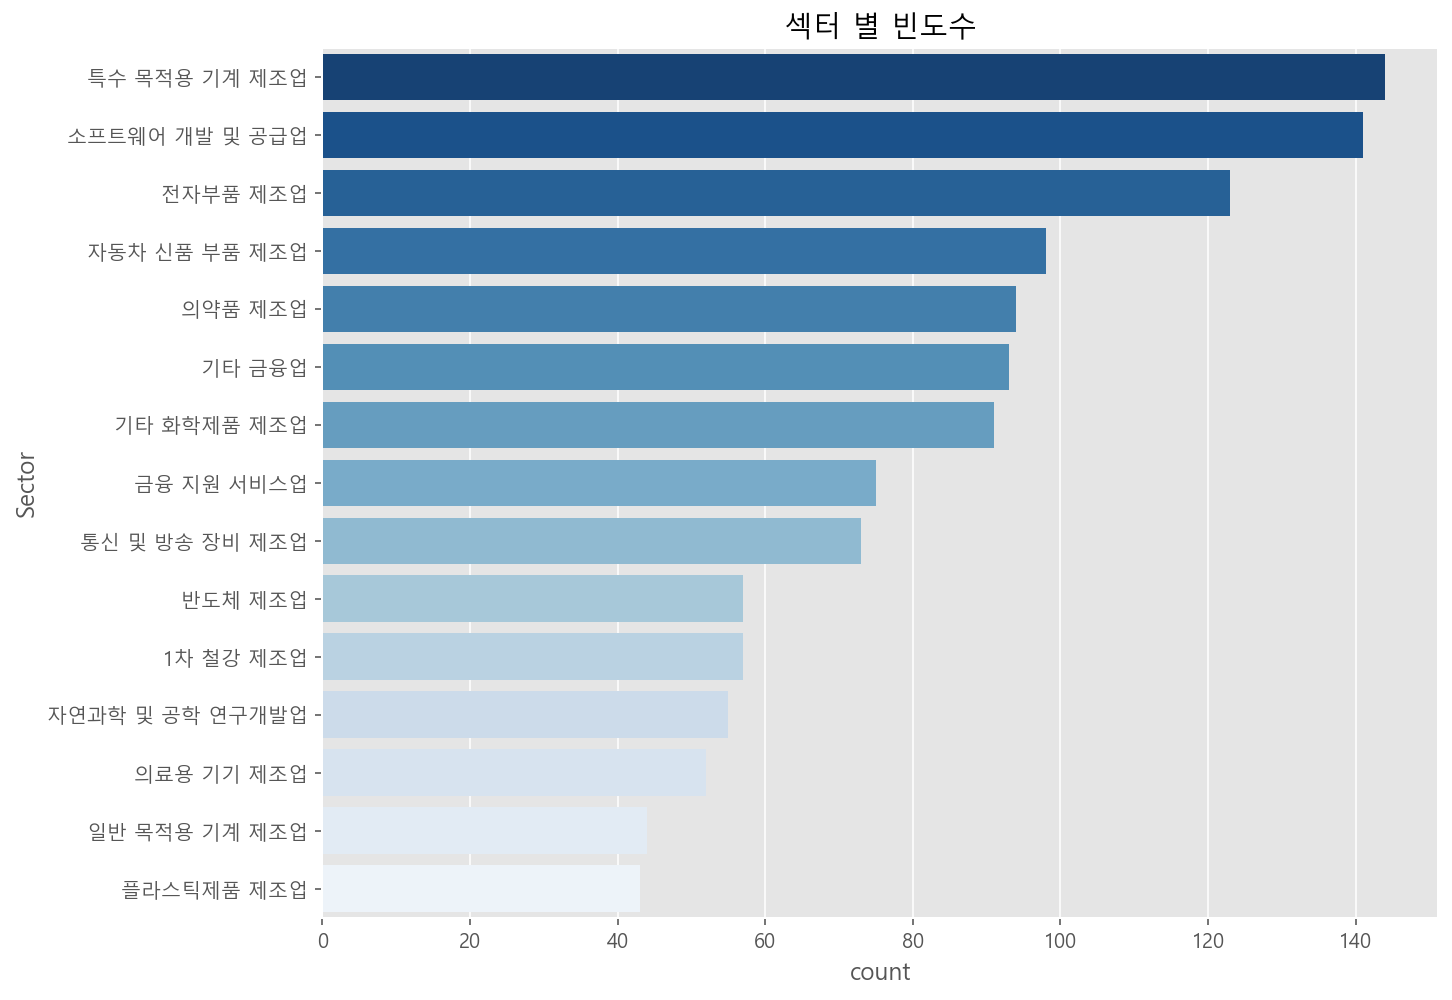

In [100]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_sector_15, y="Sector", palette="Blues_r"
              ,order=sector_count_top.index).set_title("섹터 별 빈도수") # 빈도수 index 순으로 정렬

In [86]:
# 참고 가능한 색상
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

### 변수 Industry

In [107]:
industry_top15 = df["Industry"].value_counts().head(15)
industry_top15.index

Index(['기업인수합병', '지주회사', '지주사업', '기업인수 및 합병', '기업 인수 및 합병', '모바일게임', '화장품',
       '벤처캐피탈', '금융지원 서비스', '증권업', '자동차부품', '금융지원서비스', '셋톱박스', '도급공사', '의약품'],
      dtype='object')

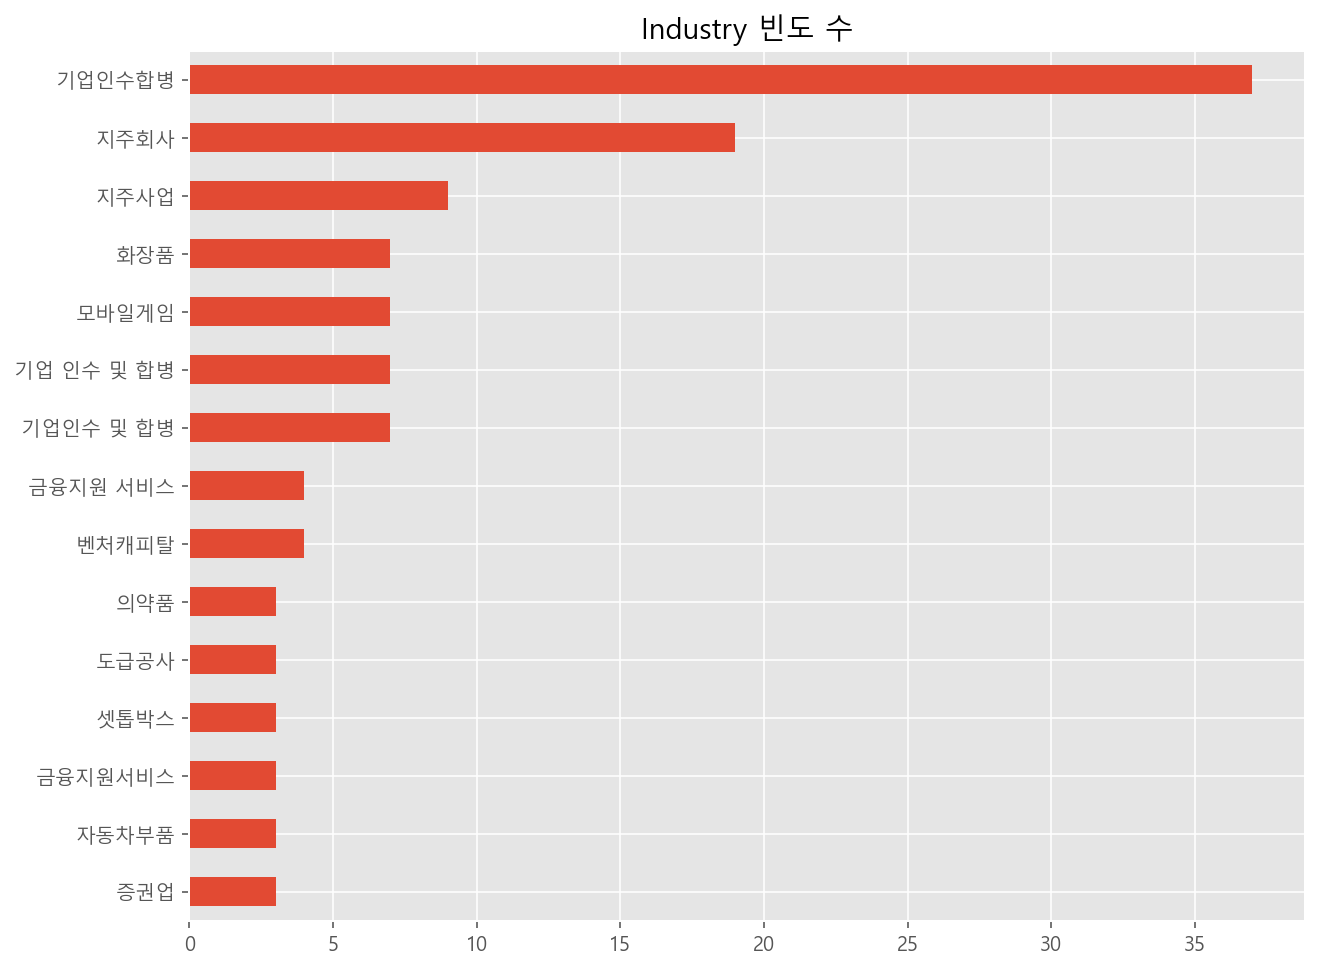

In [111]:
# pandas

industry_top15.sort_values().plot.barh(figsize=(10,8),title="Industry 빈도 수")

Text(0.5, 1.0, 'Industry 빈도 수')

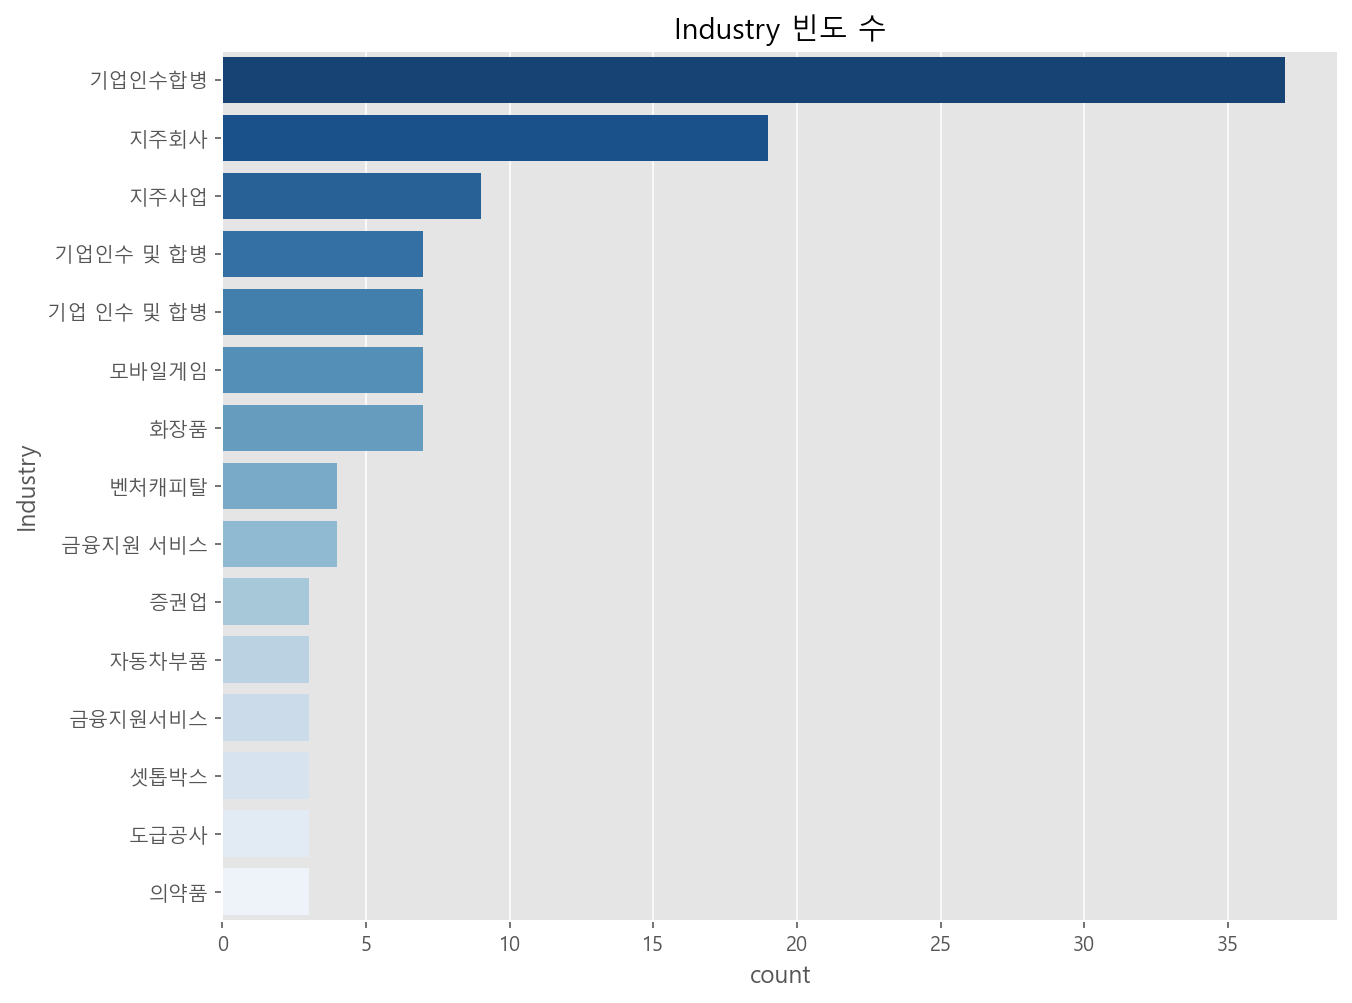

In [119]:
# seaborn

plt.figure(figsize=(10,8))

sns.countplot(data=df[df["Industry"].isin(industry_top15.index)],
             y="Industry", palette="Blues_r",
             order=industry_top15.index).set_title("Industry 빈도 수")

### 변수 Region

In [109]:
df["Region"].value_counts()

서울특별시      987
경기도        681
충청남도        96
경상남도        91
인천광역시       86
충청북도        81
부산광역시       75
경상북도        64
대구광역시       55
대전광역시       53
전라북도        27
강원도         27
울산광역시       26
광주광역시       23
전라남도        23
제주특별자치도     10
홍콩           9
세종특별자치시      9
미국           6
케이맨 제도       5
일본           3
싱가포르         1
Name: Region, dtype: int64

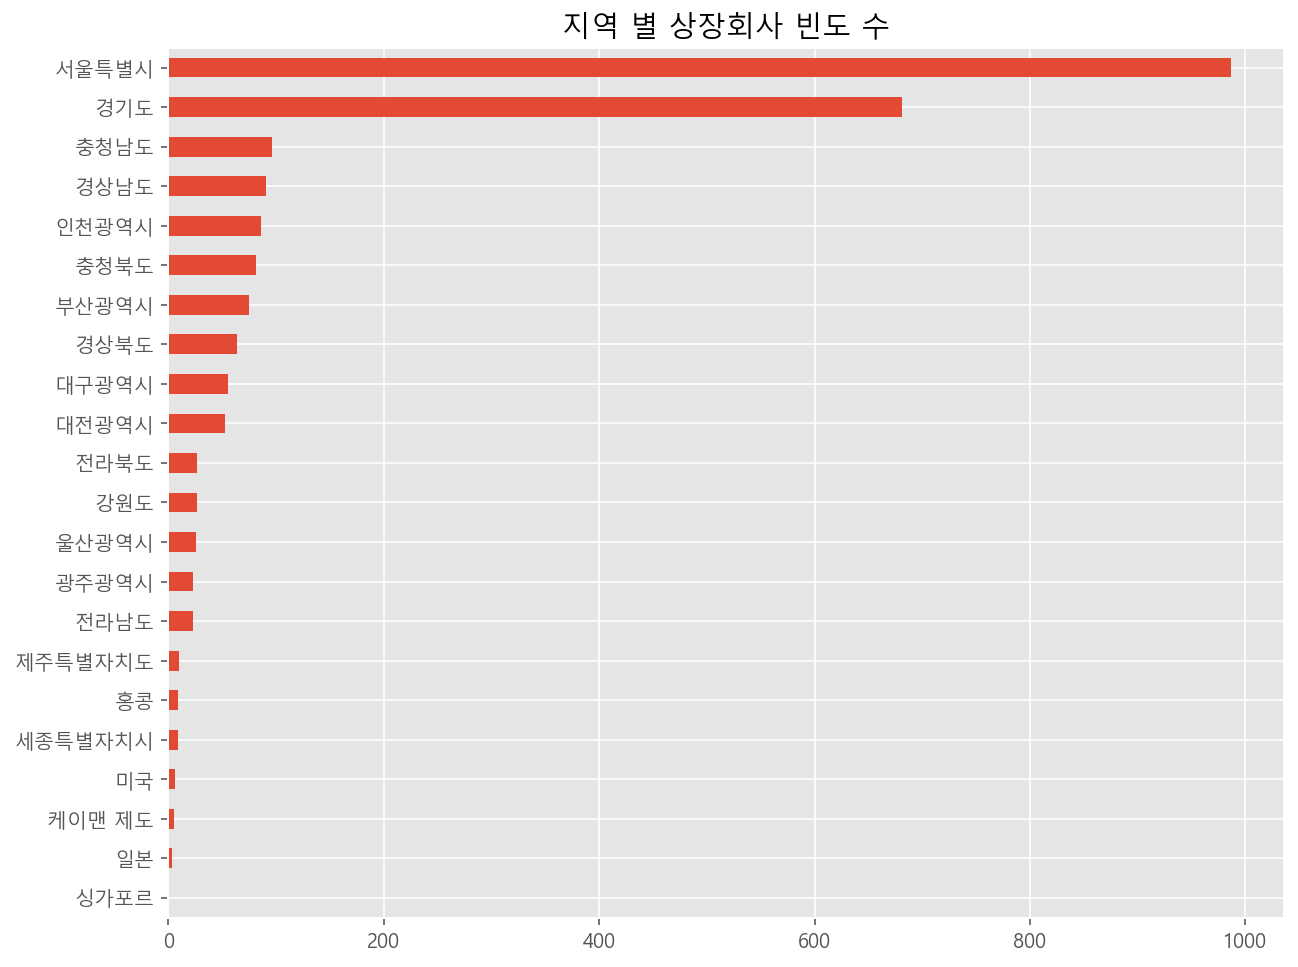

In [125]:
# pandas

df["Region"].value_counts().sort_values().plot.barh(figsize=(10,8) , title="지역 별 상장회사 빈도 수")

Text(0.5, 1.0, '지역 별 상장 종목 수')

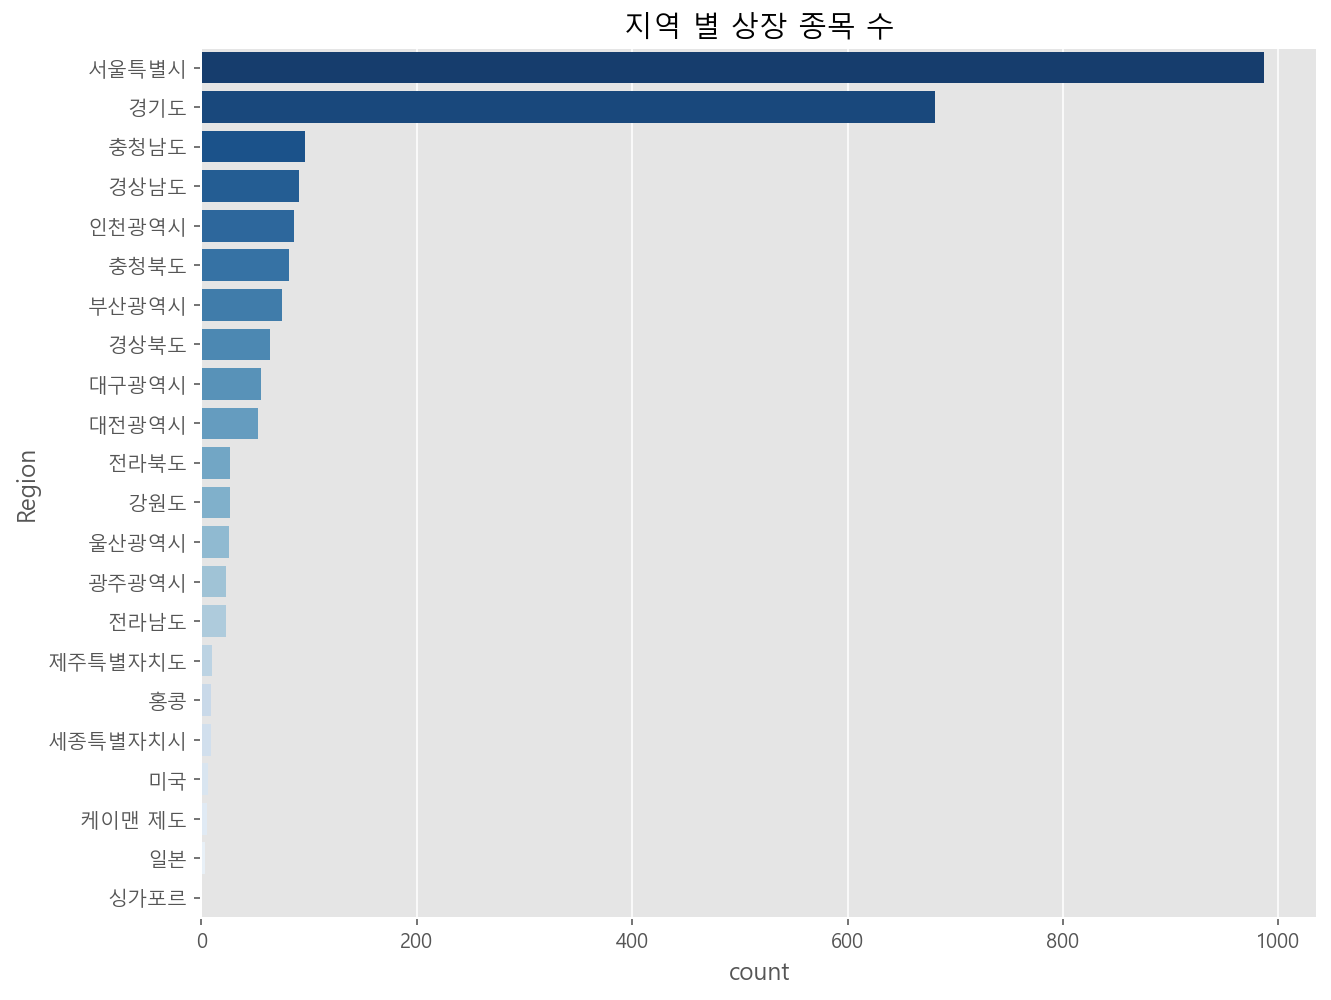

In [135]:
# seaborn
plt.figure(figsize=(10,8))

sns.countplot(data= df, y="Region", palette="Blues_r",
              order=df["Region"].value_counts().index).set_title("지역 별 상장 종목 수")

### 두 개의 변수

#### crosstab 

##### 지역 별 상장 종목 빈도수

In [136]:
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,36,0,6,5,1,7,0,1,53,...,0,4,0,3,1,1,3,9,0,0
KOSDAQ,16,498,49,39,9,33,38,6,38,527,...,10,57,3,13,15,2,67,58,4,9
KOSPI,4,147,42,19,9,21,8,0,36,407,...,16,25,0,7,11,7,26,14,1,0


Text(0.5, 1.0, '마켓 별 상장 종목 빈도수')

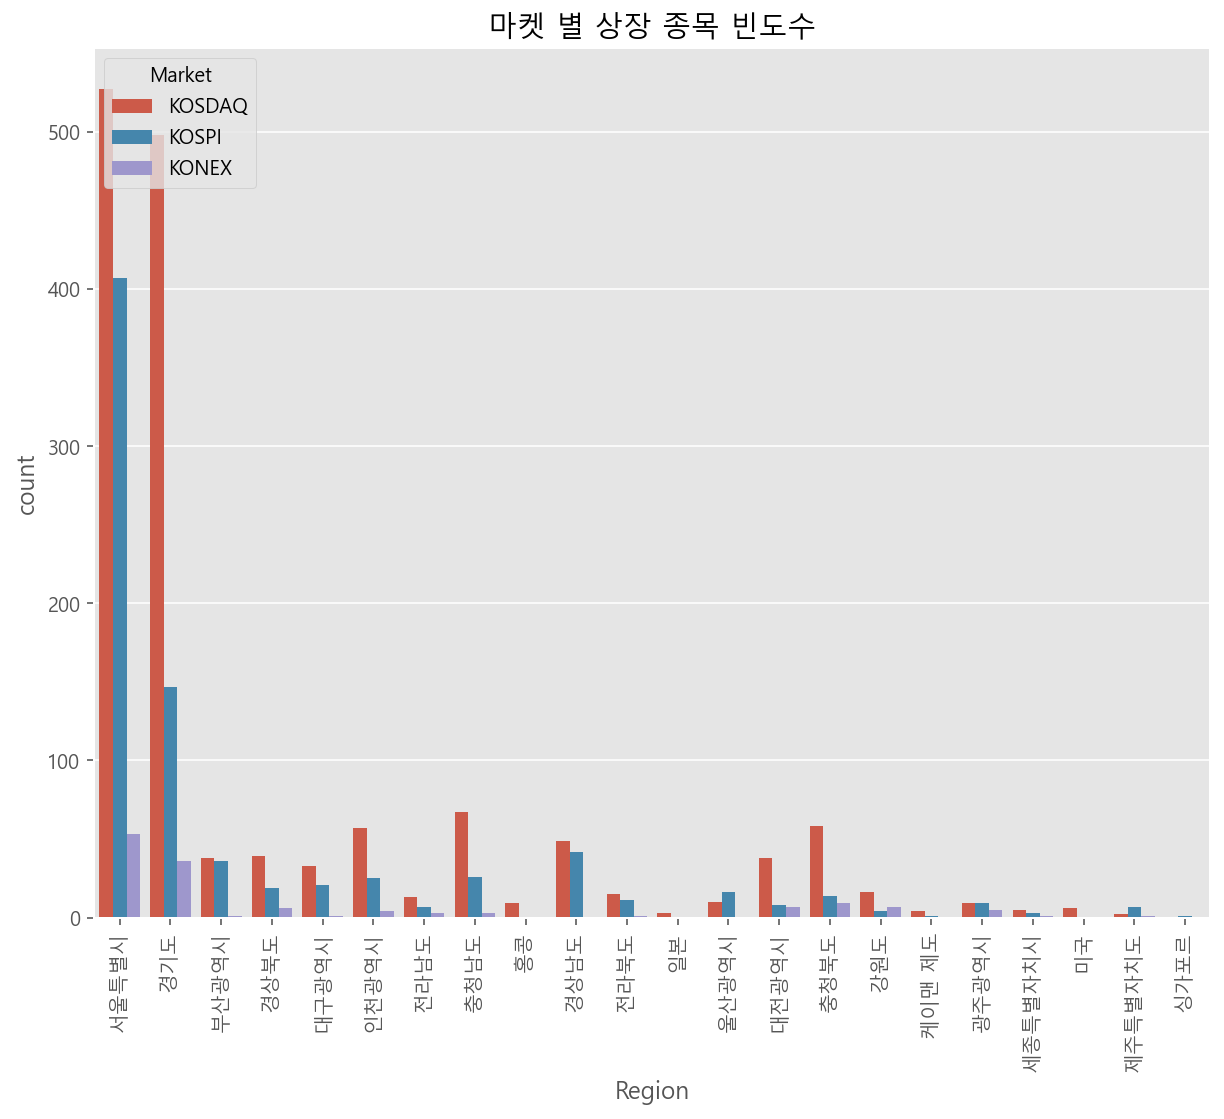

In [143]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)

sns.countplot(data=df, x="Region", hue="Market").set_title("마켓 별 상장 종목 빈도수")

##### 연도 별 상장 종목 빈도수

In [152]:
market_year = pd.crosstab(df["Market"],df["ListingYear"])
market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,13,27,26,19,14,15,12,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,20,35,59,90,65,68,89,97,86,33
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,5


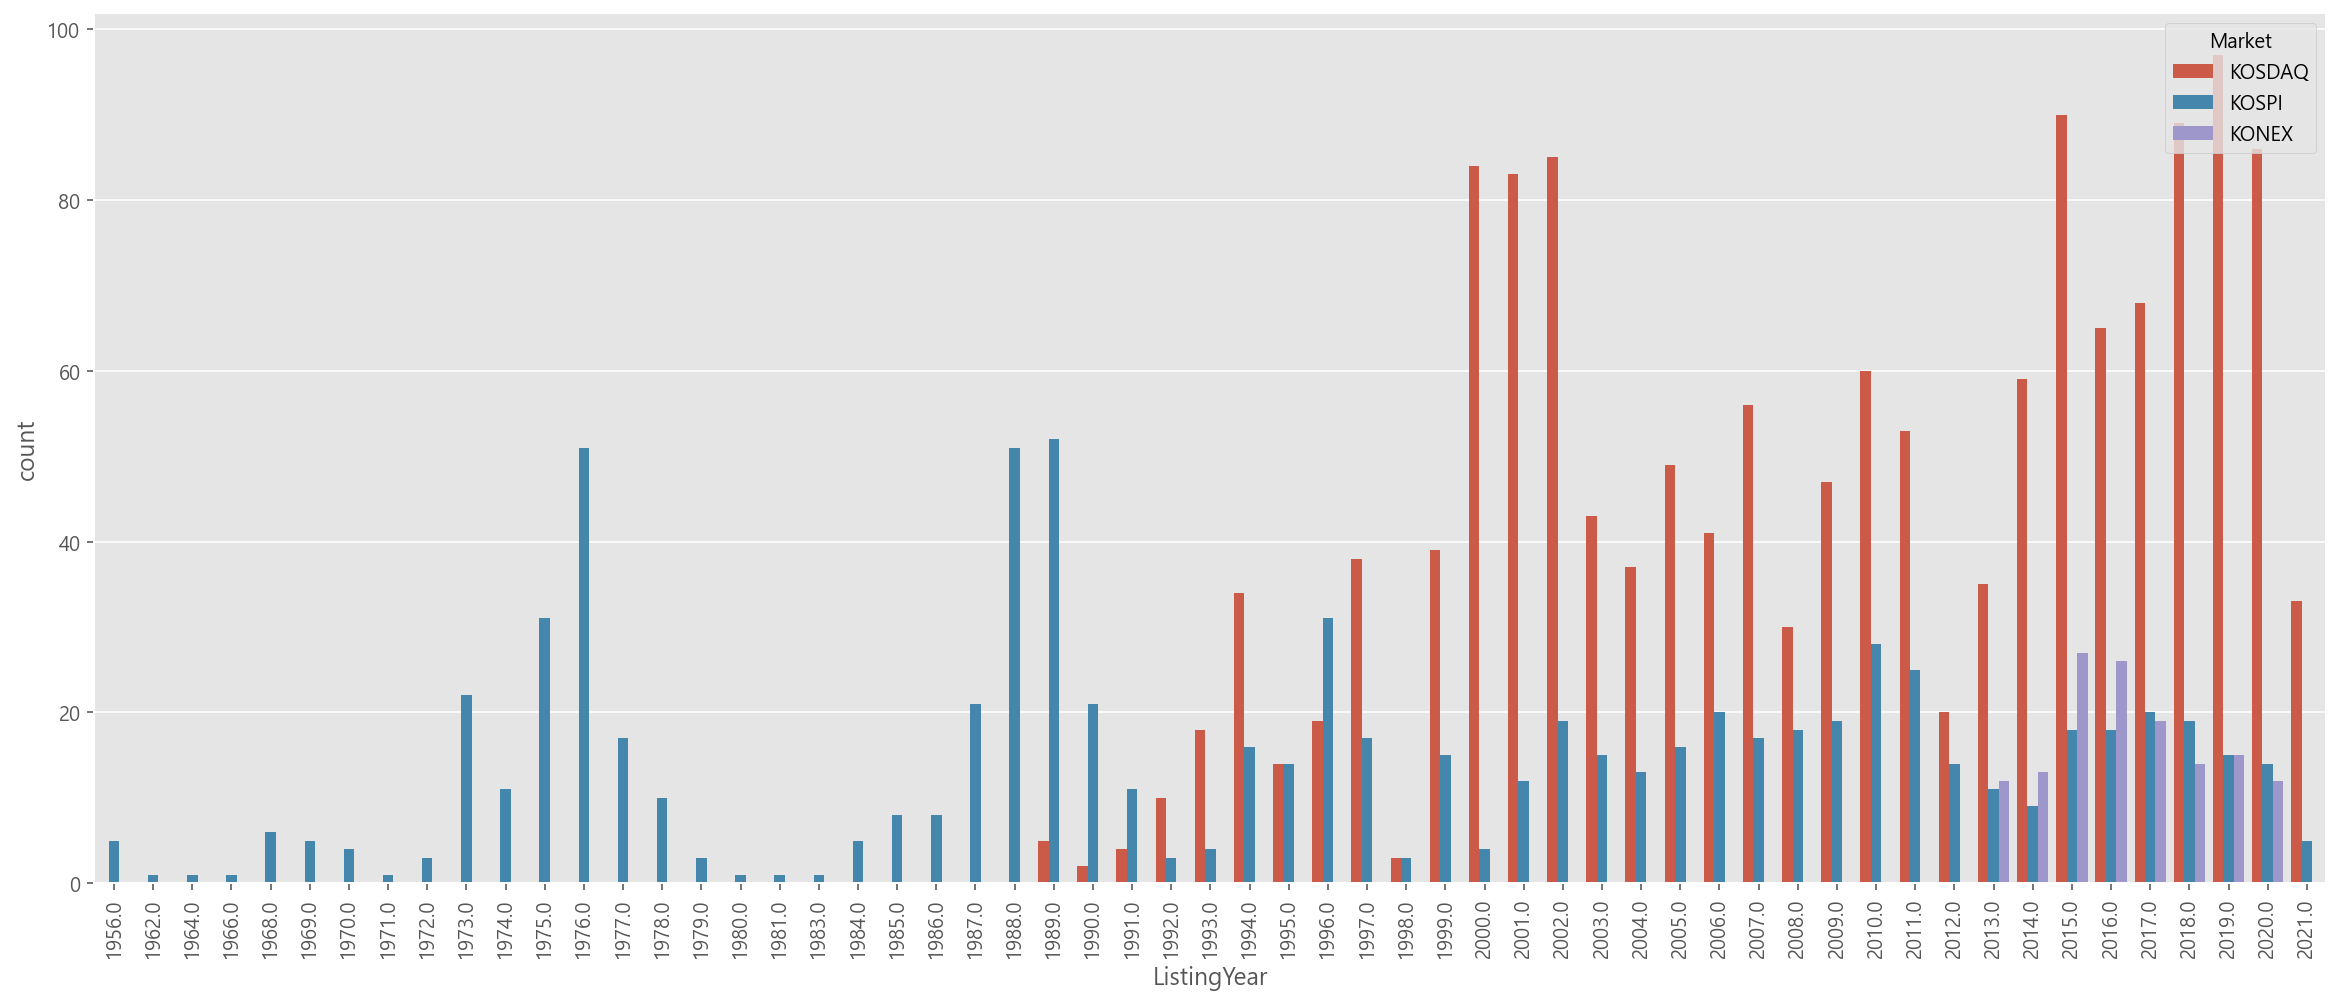

In [151]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

sns.countplot(data=df, x="ListingYear", hue="Market")

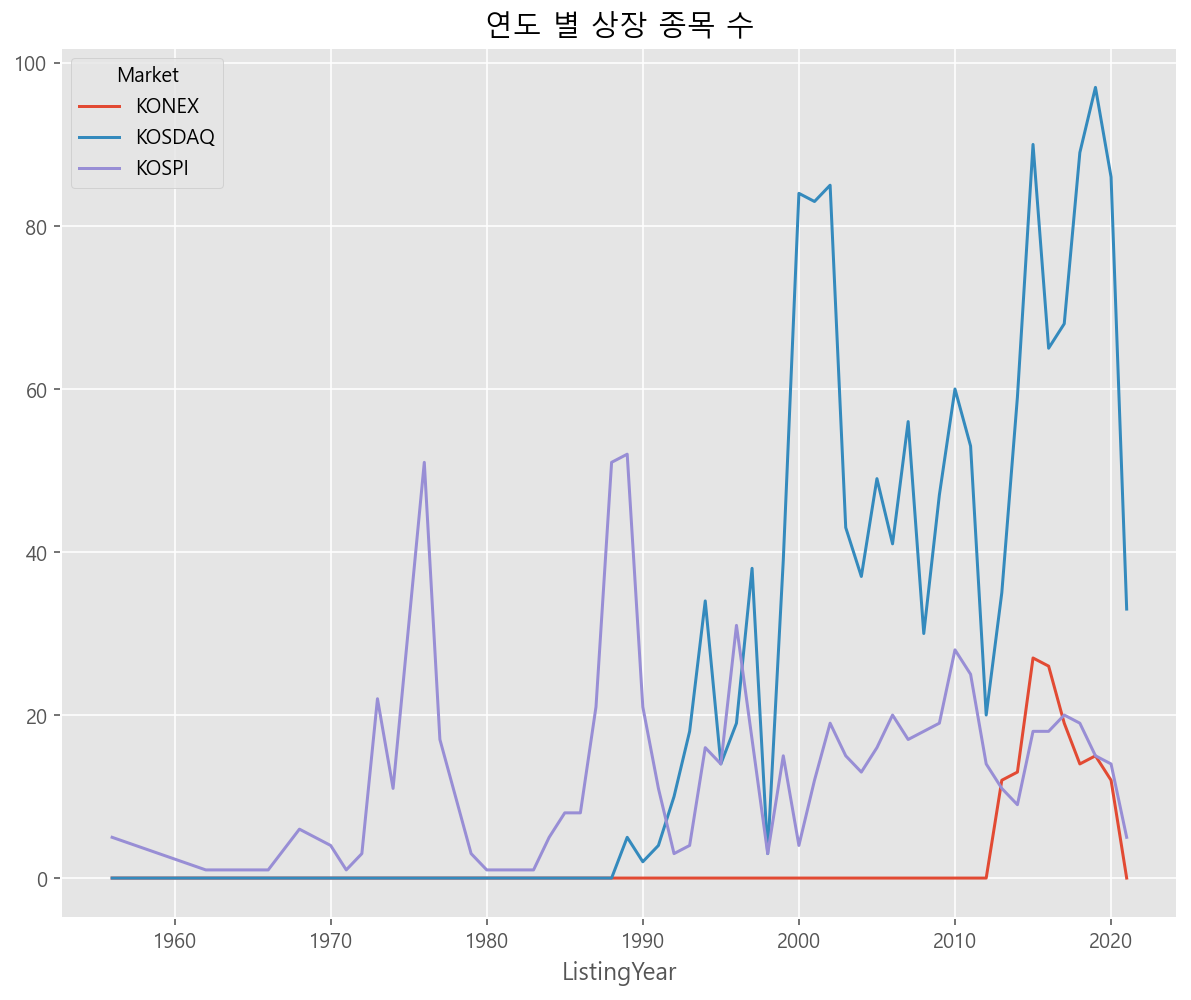

In [156]:
# pandas

market_year.T.plot(figsize=(10,8), title="연도 별 상장 종목 수")  # index 와 칼럼명 바꾸기 Transpose의 T

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002324CA59760>,
      dtype=object)

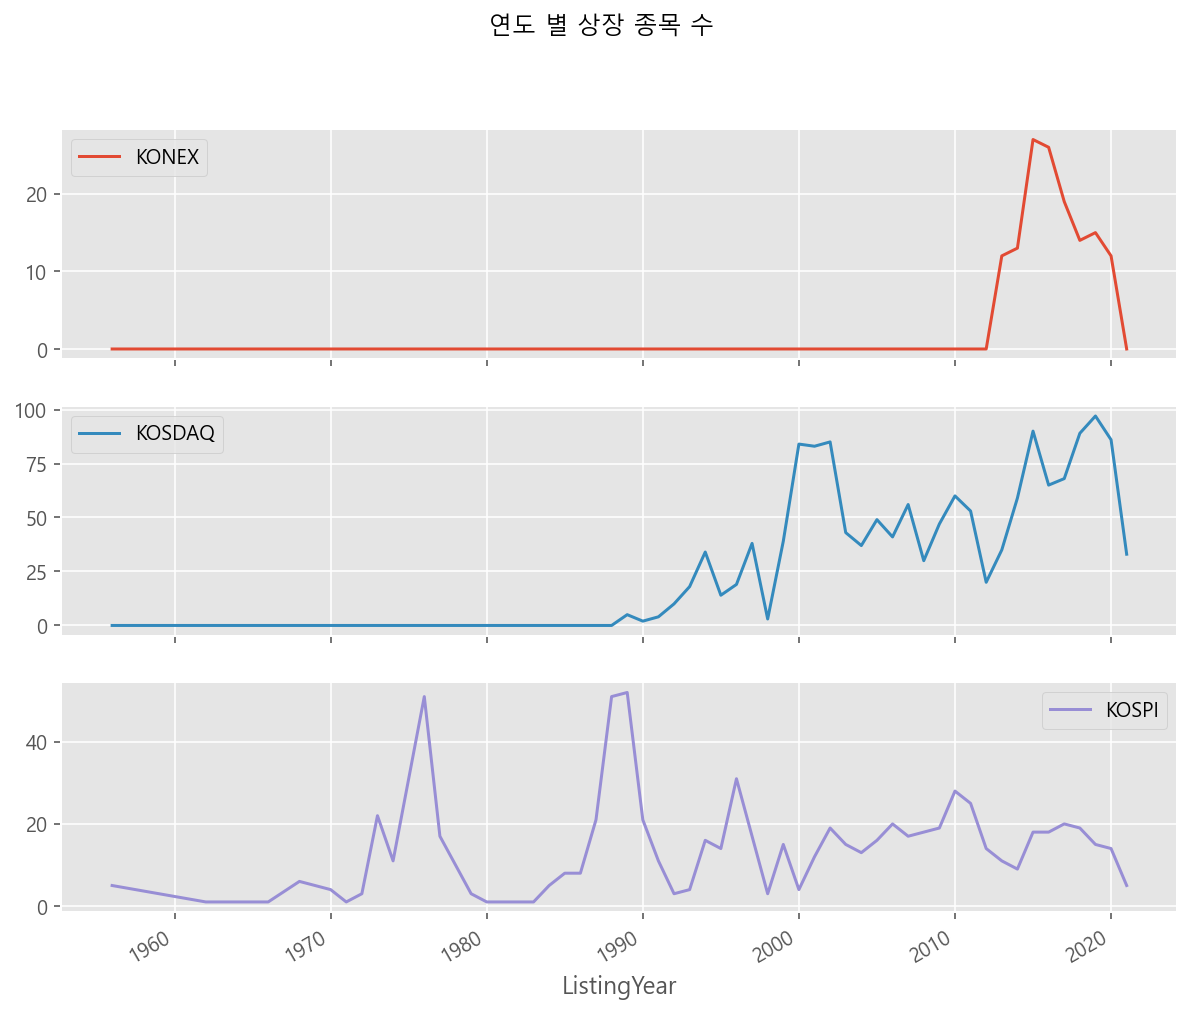

In [157]:
# 컬럼 값 subplot
market_year.T.plot(figsize=(10,8),
                   subplots=True,
                   title="연도 별 상장 종목 수")  

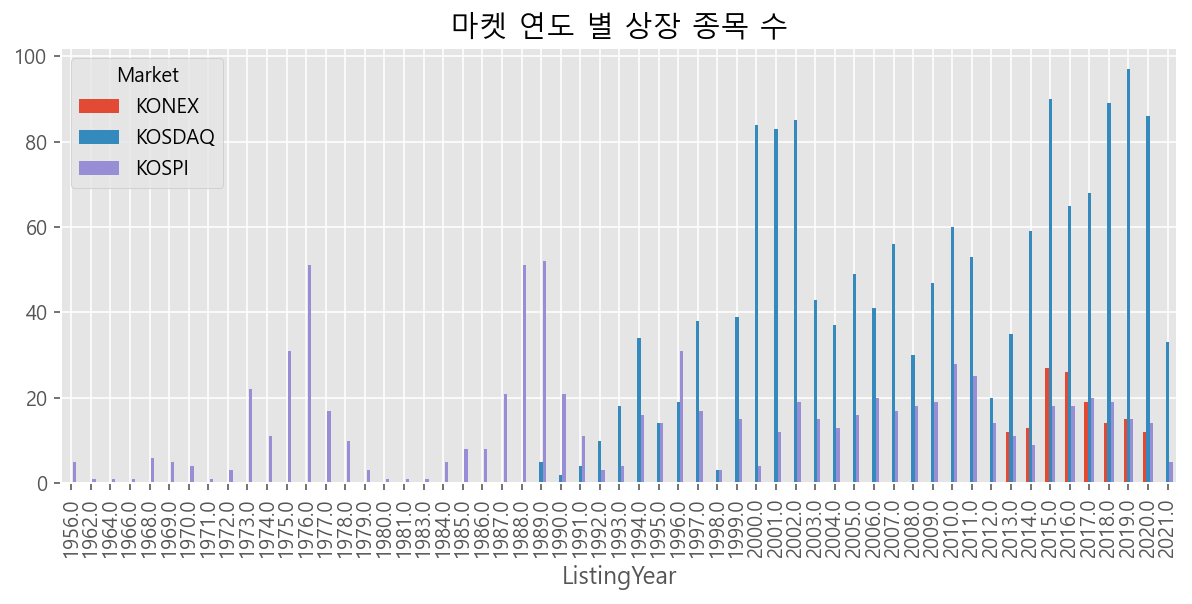

In [162]:
market_year.T.plot.bar(figsize=(10,4), title="마켓 연도 별 상장 종목 수")

In [163]:
# 컬럼 명 데이터 타입 소수점을 없애기 위해 int 타입으로 변경
market_year.columns = market_year.columns.astype(int)
market_year

,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,13,27,26,19,14,15,12,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,20,35,59,90,65,68,89,97,86,33
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,5


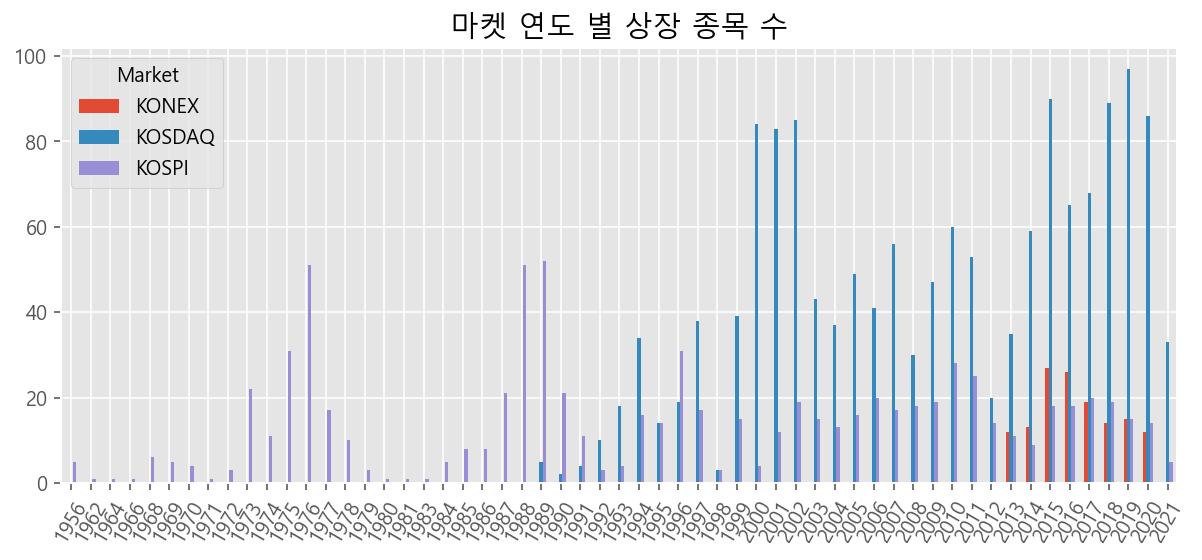

In [165]:
market_year.T.plot.bar(figsize=(10,4), title="마켓 연도 별 상장 종목 수", rot=60)

#### groupby & pivot_table

In [169]:
# groupby

df.groupby(["Market","ListingYear"])["Symbol"].count()

Market  ListingYear
KONEX   2013.0         12
        2014.0         13
        2015.0         27
        2016.0         26
        2017.0         19
                       ..
KOSPI   2017.0         20
        2018.0         19
        2019.0         15
        2020.0         14
        2021.0          5
Name: Symbol, Length: 98, dtype: int64

In [171]:
df.groupby(["Market","ListingYear"])["Symbol"].count().unstack().fillna(0).astype(int)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,13,27,26,19,14,15,12,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,20,35,59,90,65,68,89,97,86,33
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,5


In [175]:
# pivot_table

pd.pivot_table(data=df, index="Market", 
                   columns="ListingYear",
                  values="Symbol", aggfunc="count", fill_value=0)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,13,27,26,19,14,15,12,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,20,35,59,90,65,68,89,97,86,33
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,5


##### scatter plot

In [176]:
market_year = df.groupby(["Market","ListingYear"])["Symbol"].count()
market_year.unstack().fillna(0).astype(int)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,13,27,26,19,14,15,12,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,20,35,59,90,65,68,89,97,86,33
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,5


In [179]:
df_market_year = market_year.reset_index()
df_market_year = df_market_year.rename(columns={"Symbol":"count"})
df_market_year

,Market,ListingYear,count
0,KONEX,2013.0,12
1,KONEX,2014.0,13
2,KONEX,2015.0,27
3,KONEX,2016.0,26
4,KONEX,2017.0,19
...,...,...,...
93,KOSPI,2017.0,20
94,KOSPI,2018.0,19
95,KOSPI,2019.0,15
96,KOSPI,2020.0,14


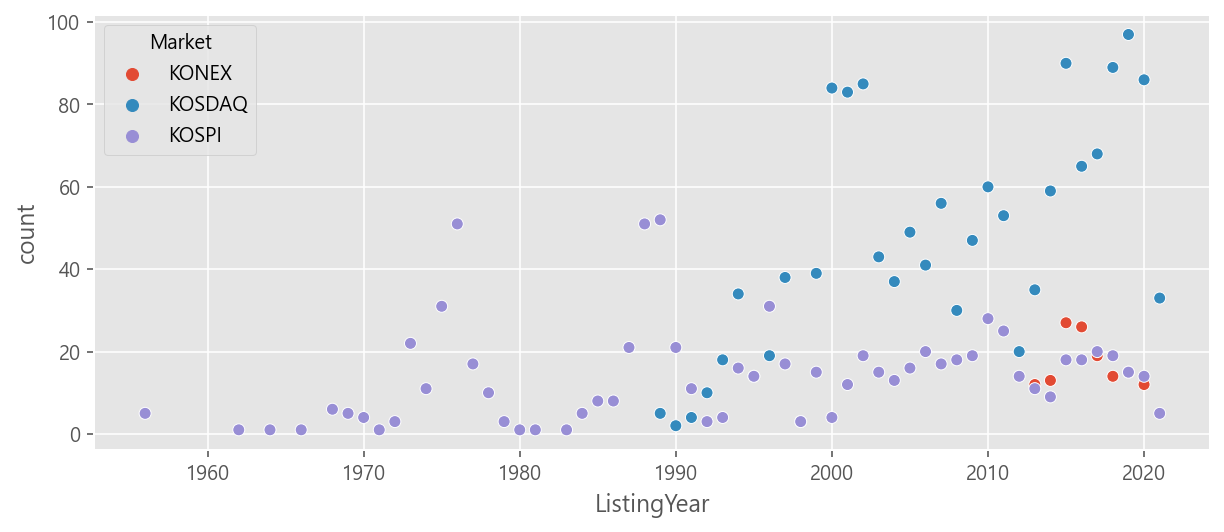

In [183]:
plt.figure(figsize=(10,4))

sns.scatterplot(data=df_market_year, x="ListingYear", y="count" , hue="Market")

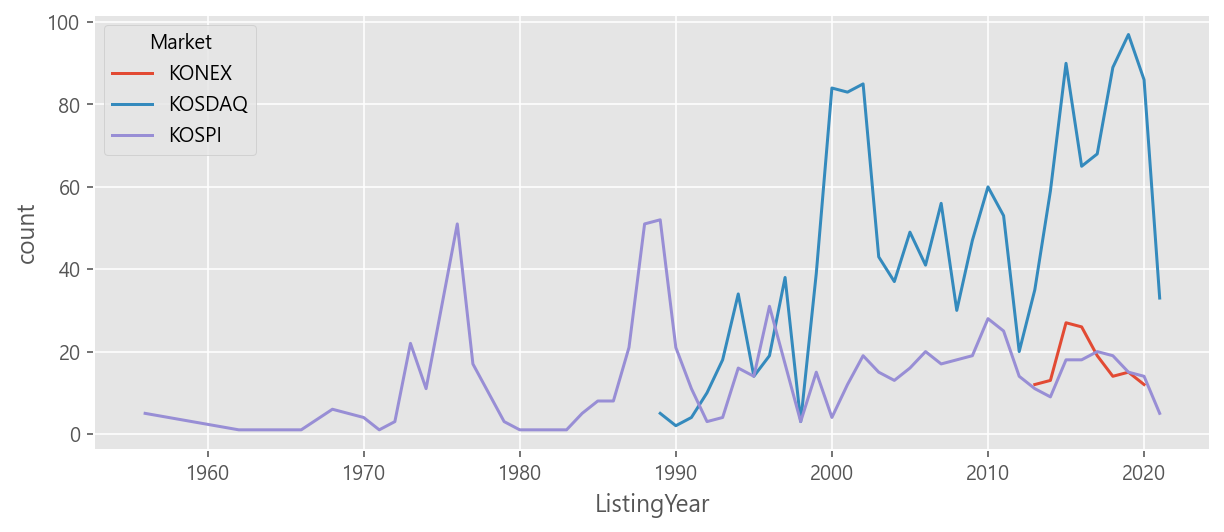

In [186]:
# lineplot
plt.figure(figsize=(10,4))

sns.lineplot(data=df_market_year, x="ListingYear", y="count", ci=None, hue="Market")

<Figure size 720x288 with 0 Axes>

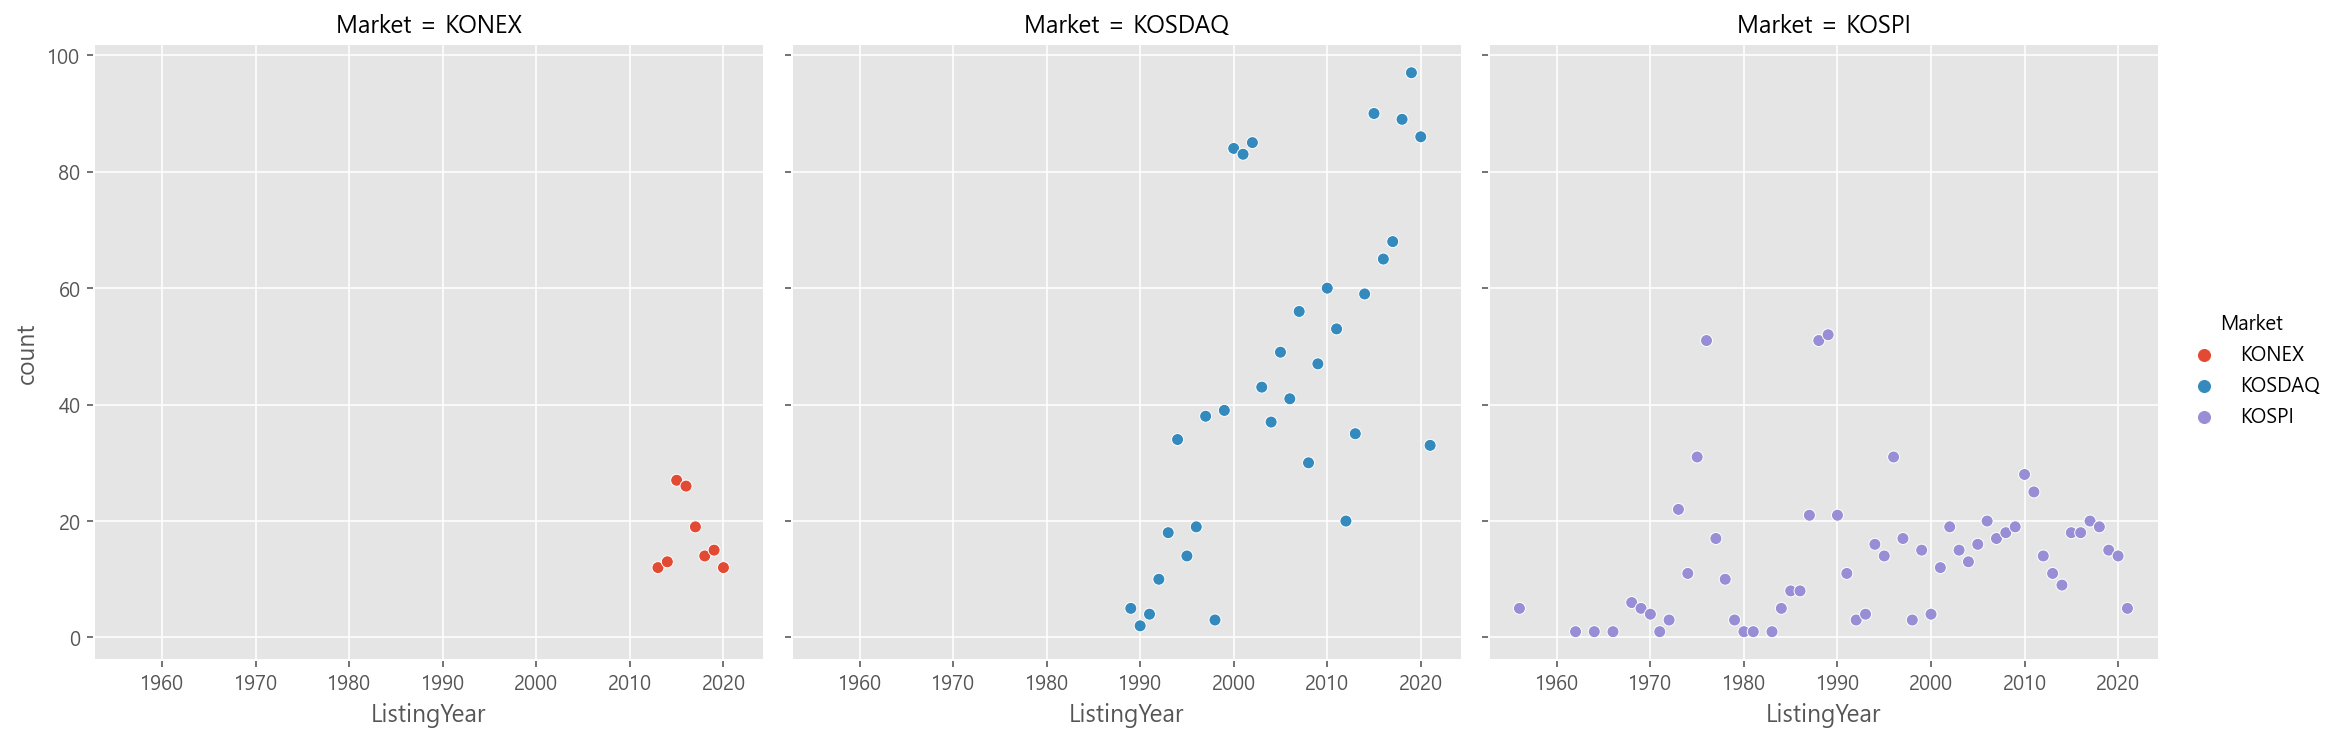

In [188]:
# relplot으로 subplot - scatter

plt.figure(figsize=(10,4))

sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market", col="Market")

<Figure size 720x288 with 0 Axes>

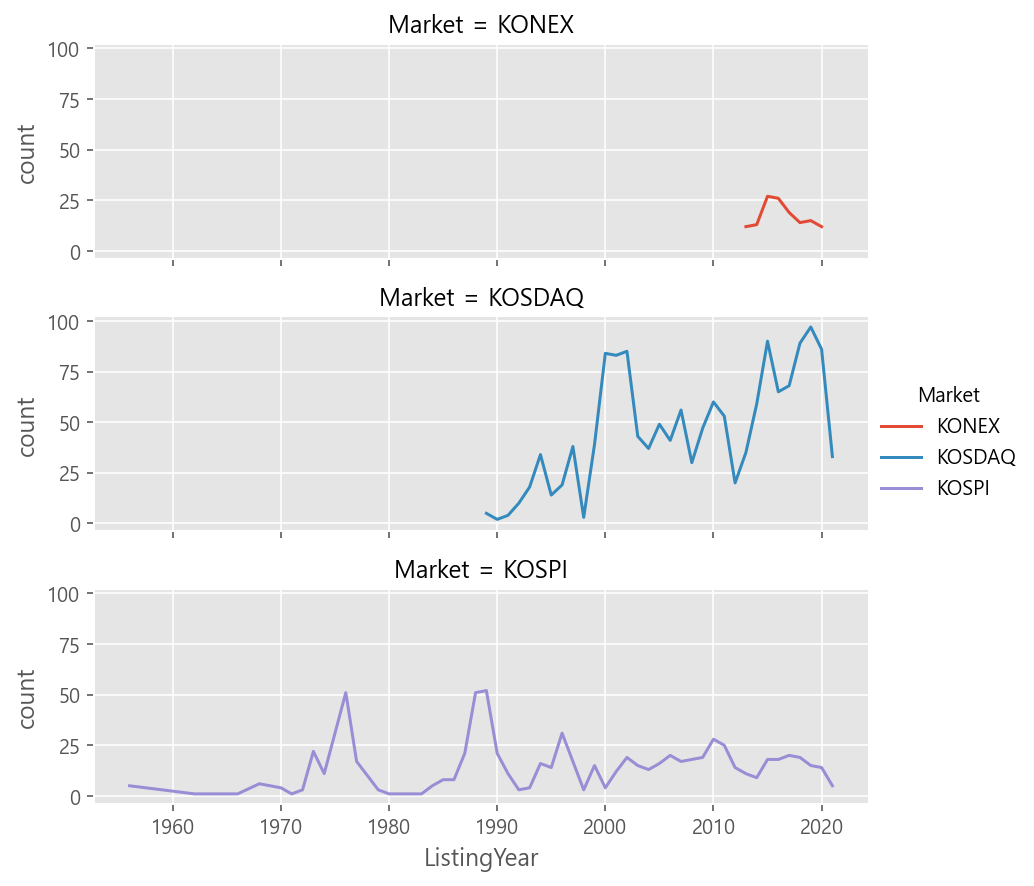

In [192]:
# relplot으로 subplot - line

plt.figure(figsize=(10,4))

sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market", 
            row="Market" , kind="line", height=2, aspect=3)

## 구간화 binnig 과 히스토그램

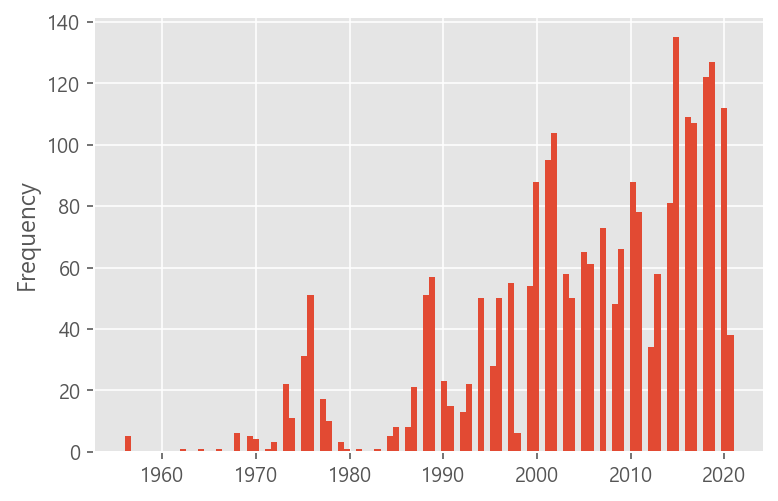

In [197]:
df["ListingYear"].plot.hist(bins=100)

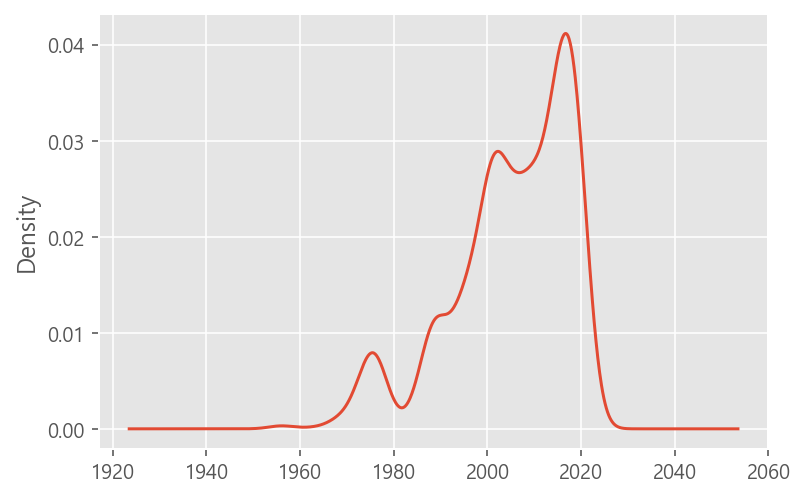

In [198]:
df["ListingYear"].plot.kde()

# 데이터 색인

In [201]:
df[df["Region"] == "케이맨 제도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
2220,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
2253,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
3941,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
4197,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
4847,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [202]:
df["ListingYear"].describe()

count    2438.000000
mean     2005.041427
std        12.684693
min      1956.000000
25%      1999.000000
50%      2007.000000
75%      2016.000000
max      2021.000000
Name: ListingYear, dtype: float64

In [203]:
# 1970년 이전에 상장한 기업
df[df["ListingYear"] < 1970 ]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
56,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시,1956.0
77,001530,KOSPI,DI동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,"서태원, 손재선",http://www.dong-il.com,서울특별시,1964.0
1909,004250,KOSPI,NPC,플라스틱제품 제조업,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매",1969-09-08,12월,최병민,http://www.npc.co.kr,경기도,1969.0
2202,000050,KOSPI,경방,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시,1956.0
2476,001440,KOSPI,대한전선,절연선 및 케이블 제조업,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사",1968-12-27,12월,나형균,http://www.taihan.com,경기도,1968.0
2478,001790,KOSPI,대한제당,"곡물가공품, 전분 및 전분제품 제조업","제당,가축용 배합사료,설탕,기능성감미료(자일로올리고당),외식산 제조,도소매/부동산 임대",1968-12-27,12월,김기영,http://www.ts.co.kr,인천광역시,1968.0
2481,003490,KOSPI,대한항공,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",1966-03-18,12월,"조원태, 우기홍",http://www.koreanair.com,서울특별시,1966.0
2733,000060,KOSPI,메리츠화재,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시,1956.0
3600,000070,KOSPI,삼양홀딩스,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 윤재엽",http://www.samyang.com,서울특별시,1968.0
3699,002420,KOSPI,세기상사,"영화, 비디오물, 방송프로그램 제작 및 배급업","극장(영화상영)/극영화,만화영화 제조/음식료품,일용잡화 소매/부동산 임대",1968-12-27,12월,조영준,http://daehancinema.com,서울특별시,1968.0


In [205]:
df[ (df["ListingYear"] == 2020) & (df["Region"] == "서울특별시") & (df["Market"] == "KOSPI") ]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
93,365550,KOSPI,ESR켄달스퀘어리츠,부동산 임대 및 공급업,부동산투자,2020-12-23,05월,박래익,http://www.esrks-reit.com,서울특별시,2020.0
3408,357250,KOSPI,미래에셋맵스리츠,부동산 임대 및 공급업,부동산 임대업,2020-08-05,11월,김호식,http://www.maps1reit.miraeasset.com,서울특별시,2020.0
4145,244920,KOSPI,에이플러스에셋,보험 및 연금관련 서비스업,보험대리 및 중개업,2020-11-20,12월,"곽근호, 서성식, 조규남",NaN,서울특별시,2020.0
4495,350520,KOSPI,이지스레지던스리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-08-05,06월,박영희,http://igisresidencereit.com/,서울특별시,2020.0
4500,334890,KOSPI,이지스밸류리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-07-16,08월,도병운,http://www.igisvaluereit.com,서울특별시,2020.0
4608,348950,KOSPI,제이알글로벌리츠,부동산 임대 및 공급업,벨기에 파이낸스 타워,2020-08-07,06월,오남수,http://jrglobalreit.com,서울특별시,2020.0
4740,344820,KOSPI,케이씨씨글라스,유리 및 유리제품 제조업,판유리 등,2020-01-21,12월,김내환,http://www.kccglass.co.kr,서울특별시,2020.0
4772,357120,KOSPI,코람코에너지리츠,부동산 임대 및 공급업,부동산 투자 및 관리,2020-08-31,11월,이성균,http://www.koramcoenergyplus.co.kr,서울특별시,2020.0
4923,363280,KOSPI,티와이홀딩스,기타 금융업,지주사업,2020-09-22,12월,유종연,http://www.ty-holdings.co.kr,서울특별시,2020.0
5077,352820,KOSPI,하이브,오디오물 출판 및 원판 녹음업,"음악 기획/제작, 퍼블리싱, 아티스트 매니지먼트",2020-10-15,12월,방시혁,http://www.bighitcorp.com,서울특별시,2020.0
